## Exercício 19: Uma árvore de decisão no scikit-learn

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import graphviz


In [20]:
URL = 'https://raw.githubusercontent.com/TrainingByPackt/Data-Science-Projects-with-Python/refs/heads/master/Data/Chapter_1_cleaned_data.csv'
df = pd.read_csv(URL)

In [21]:
features_response = df.columns.tolist()
features_response

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'EDUCATION_CAT',
 'graduate school',
 'high school',
 'none',
 'others',
 'university']

In [22]:
cols_to_remove = ['ID',
 'SEX',
 'EDUCATION',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'EDUCATION_CAT',
 'graduate school',
 'high school',
 'none',
 'others',
 'university']


In [23]:
features_response = [col for col in features_response if col not in cols_to_remove]
features_response

['LIMIT_BAL',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [25]:
X = df.loc[:, features_response].drop(columns=['default payment next month'])
y = df['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [26]:
clf = DecisionTreeClassifier(max_depth=2)

In [27]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [28]:
dot_data = tree.export_graphviz(clf, filled=True, rounded=True, proportion= True,
                               feature_names=features_response[:-1],
                               class_names=['Not default', 'Defaulted'])

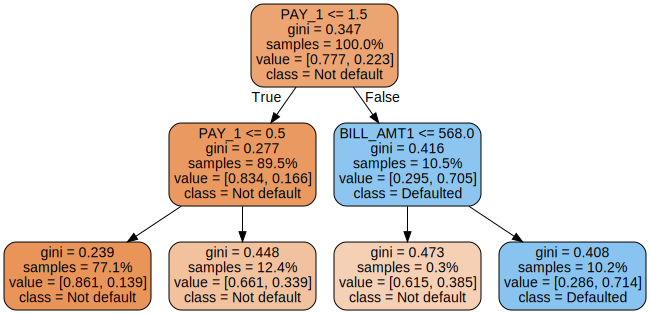

In [29]:
graphviz.Source(dot_data)

In [30]:
features_response[:-1].index('PAY_1')

3

In [31]:
X_train.shape


(21331, 16)

In [32]:
sum(X_train.iloc[:,4] <= 1.5) / X_train.shape[0]

0.0875720781960527

## Exercício 20: encontrando hiperparâmetros ótimos para uma árvore de decisão

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
X_train.shape

(21331, 16)

In [ ]:
np.log2(X.train.shape[0]) # máximo de altura que a árvore (CART) pode ter é 14.

In [38]:
params = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}

In [33]:
np.mean(y_train)

np.float64(0.223102526838873)

In [39]:
cv = GridSearchCV(clf, param_grid=params, scoring='roc_auc', n_jobs=-1, refit=True, return_train_score=True)

In [40]:
cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=2), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
             return_train_score=True, scoring='roc_auc')

In [43]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.047191,0.001589,0.016424,0.013151,1,{'max_depth': 1},0.631429,0.651817,0.647174,0.652449,...,0.646389,0.007718,12,0.650128,0.645030,0.646191,0.644872,0.645717,0.646388,0.001930
1,0.084207,0.001743,0.005516,0.000095,2,{'max_depth': 2},0.690552,0.701081,0.708298,0.712687,...,0.701770,0.007985,9,0.704561,0.702155,0.700192,0.699065,0.703232,0.701841,0.001993
2,0.120558,0.003187,0.005651,0.000261,3,{'max_depth': 3},0.721301,0.727787,0.731521,0.744994,...,0.732837,0.008259,6,0.740168,0.738819,0.736617,0.733860,0.735262,0.736945,0.002296
3,0.160748,0.008638,0.007929,0.003016,4,{'max_depth': 4},0.733626,0.736141,0.742354,0.750513,...,0.740531,0.005834,4,0.754732,0.752316,0.750710,0.748873,0.750944,0.751515,0.001947
4,0.193446,0.003573,0.005789,0.000150,5,{'max_depth': 5},0.744208,0.753847,0.738285,0.760059,...,0.747881,0.007915,2,0.768935,0.768961,0.765230,0.763080,0.764907,0.766223,0.002343
5,0.243026,0.010964,0.006894,0.001839,6,{'max_depth': 6},0.744678,0.750135,0.745011,0.761218,...,0.748821,0.006637,1,0.778624,0.782527,0.777811,0.776136,0.776149,0.778249,0.002346
6,0.442338,0.059267,0.009379,0.003253,7,{'max_depth': 7},0.745247,0.747274,0.746543,0.755928,...,0.747312,0.004735,3,0.789950,0.795927,0.792038,0.791436,0.788445,0.791559,0.002514
7,0.729210,0.337597,0.010567,0.006235,8,{'max_depth': 8},0.743869,0.740602,0.739588,0.731689,...,0.737167,0.005343,5,0.803131,0.811392,0.805962,0.807401,0.806800,0.806937,0.002665
8,0.352818,0.032159,0.006034,0.000070,9,{'max_depth': 9},0.728097,0.724953,0.729913,0.723862,...,0.725378,0.003426,7,0.819427,0.828279,0.824467,0.824163,0.826350,0.824537,0.002951
9,0.363134,0.003423,0.006084,0.000067,10,{'max_depth': 10},0.713635,0.714722,0.701411,0.710310,...,0.709351,0.004864,8,0.838617,0.846737,0.844573,0.843027,0.847632,0.844117,0.003190


In [44]:
cv.best_params_, cv.best_score_

({'max_depth': 6}, np.float64(0.7488208874310475))

In [45]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

<ErrorbarContainer object of 3 artists>

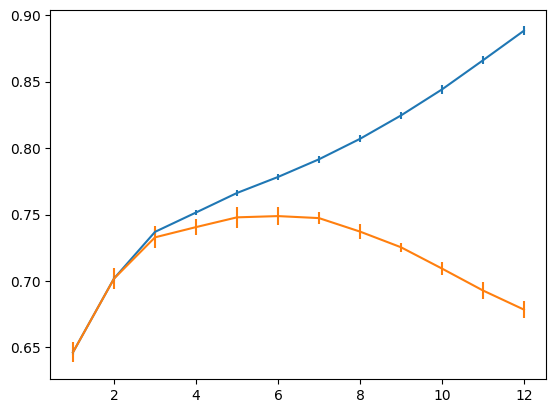

In [49]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'], cv_results_df['mean_train_score'], yerr=cv_results_df['std_train_score'])
ax.errorbar(cv_results_df['param_max_depth'], cv_results_df['mean_test_score'], yerr=cv_results_df['std_test_score'])


## Exercício 21: Ajustando uma floresta aleatória

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf = RandomForestClassifier()

In [76]:
rf_params_ex ={'n_estimators': list(range(10, 110, 10))}

In [77]:
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex, scoring='roc_auc', n_jobs=-1, refit=True, return_train_score=True, cv=4)

In [78]:
cv_rf_ex.fit(X_train, y_train)


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='roc_auc')

In [81]:
cv_results_rf = pd.DataFrame(cv_rf_ex.cv_results_)
cv_results_rf.T

,0,1,2,3,4,5,6,7,8,9
mean_fit_time,1.219873,2.532355,3.137937,4.861516,5.826853,6.803168,7.940709,9.698782,11.712868,10.785108
std_fit_time,0.203308,0.493482,0.038808,0.687119,0.659949,0.640243,0.722492,0.179512,1.124151,0.222115
mean_score_time,0.032157,0.046024,0.0645,0.063343,0.103582,0.147744,0.106985,0.122861,0.141578,0.208957
std_score_time,0.010616,0.017021,0.020842,0.002377,0.02799,0.03729,0.002411,0.005604,0.012156,0.06191
param_n_estimators,10,20,30,40,50,60,70,80,90,100
params,{'n_estimators': 10},{'n_estimators': 20},{'n_estimators': 30},{'n_estimators': 40},{'n_estimators': 50},{'n_estimators': 60},{'n_estimators': 70},{'n_estimators': 80},{'n_estimators': 90},{'n_estimators': 100}
split0_test_score,0.714754,0.738197,0.737313,0.740384,0.746541,0.747001,0.743735,0.749278,0.745212,0.748342
split1_test_score,0.714687,0.737178,0.740335,0.742806,0.744402,0.746009,0.743688,0.747179,0.74531,0.747414
split2_test_score,0.735303,0.746366,0.760047,0.762973,0.763824,0.762906,0.770011,0.764642,0.767815,0.769067
split3_test_score,0.72883,0.749902,0.752316,0.759307,0.757553,0.761019,0.763789,0.766058,0.760917,0.765301


<ErrorbarContainer object of 3 artists>

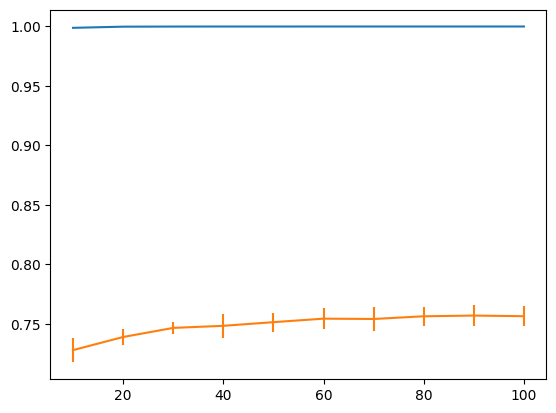

In [66]:
ax = plt.axes()
ax.errorbar(cv_results_rf['param_n_estimators'], cv_results_rf['mean_train_score'], yerr=cv_results_rf['std_train_score'])
ax.errorbar(cv_results_rf['param_n_estimators'], cv_results_rf['mean_test_score'], yerr=cv_results_rf['std_test_score'])

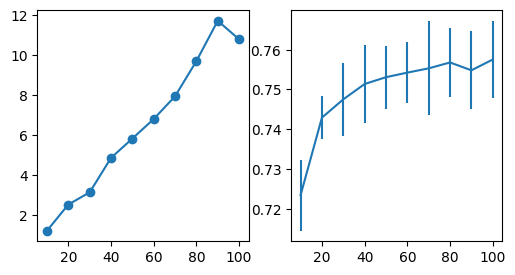

In [80]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6,3))
axs[0].plot(cv_results_rf['param_n_estimators'], cv_results_rf['mean_fit_time'], '-o')
axs[1].errorbar(cv_results_rf['param_n_estimators'], cv_results_rf['mean_test_score'], yerr=cv_results_rf['std_test_score']);
